In [1]:
%matplotlib notebook

In [2]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
vehicle_df = pd.read_csv("vehicle_data2.csv")
year = vehicle_df.iloc[:, 0]

In [25]:
vehicle_df["Year"]

vehicle_df.set_index('Year')

vehicle_df.columns

Index(['Year', 'Registered Vehicles', 'Miles traveled ', 'Fuel consumed',
       'Miles traveled per vehicle', 'Miles traveled per gallon',
       'Fuel consumed by vehicle '],
      dtype='object')

In [5]:
vehicle_df.head()

,Year,Registered Vehicles,Miles traveled,Fuel consumed,Miles traveled per vehicle,Miles traveled per gallon,Fuel consumed by vehicle
0,1960,73858,718762,57880,9.7,12.4,784
1,1965,90358,887812,71104,9.8,12.5,787
2,1970,111242,1109724,92329,10.0,12.0,830
3,1975,137913,1327664,108984,9.6,12.2,790
4,1980,161490,1527295,114960,9.5,13.3,712


<IPython.core.display.Javascript object>


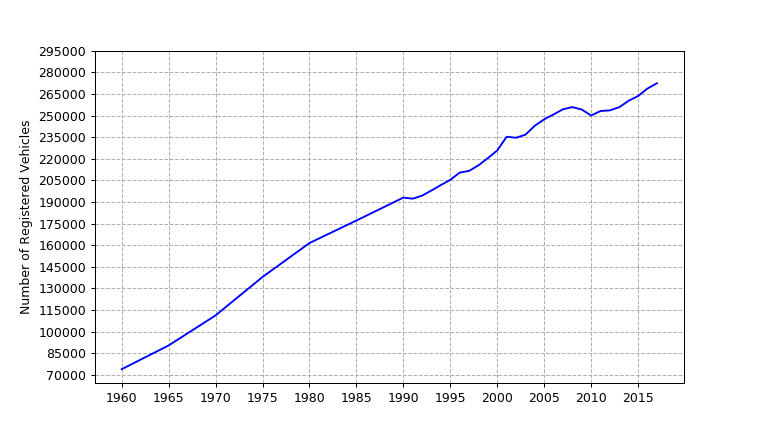

In [67]:
plt.figure(1)
plt.plot(vehicle_df["Year"], vehicle_df["Registered Vehicles"], color="blue", label="World Average" )
plt.yticks(list(np.arange(70000,300000,15000)))
plt.xticks(list(np.arange(1960,2017,5)))
plt.grid(linestyle='--')
plt.ylabel("Number of Registered Vehicles")

plt.show()

<IPython.core.display.Javascript object>


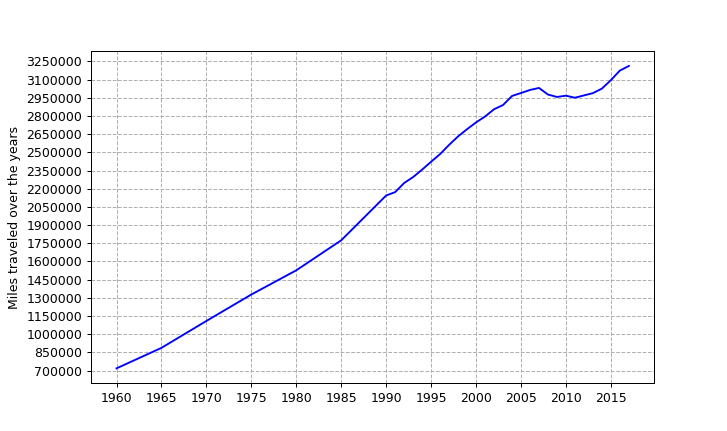

In [65]:
plt.figure(2)
plt.plot(vehicle_df["Year"], vehicle_df["Miles traveled "], color="blue", label="World Average" )
plt.yticks(list(np.arange(700000,3300000,150000)))
plt.xticks(list(np.arange(1960,2017,5)))
plt.grid(linestyle='--')
plt.ylabel("Miles traveled over the years")

plt.show()

<IPython.core.display.Javascript object>


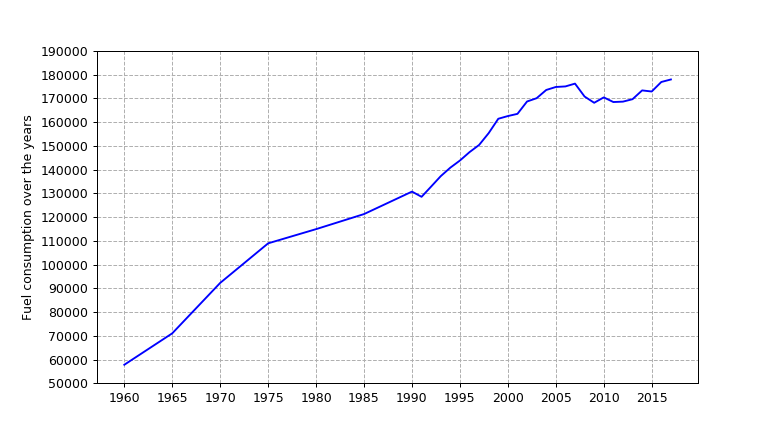

In [66]:
plt.figure(3)
plt.plot(vehicle_df["Year"], vehicle_df["Fuel consumed"], color="blue", label="World Average" )
plt.yticks(list(np.arange(50000,200000,10000)))
plt.xticks(list(np.arange(1960,2017,5)))
plt.grid(linestyle='--')
plt.ylabel("Fuel consumption over the years")

plt.show()

<IPython.core.display.Javascript object>


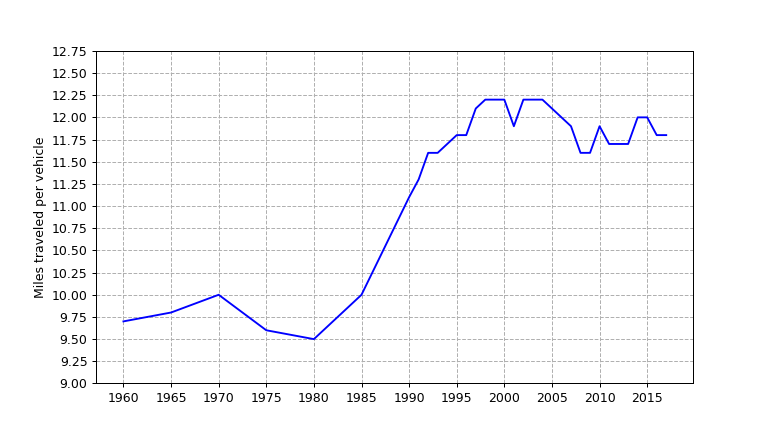

In [88]:
plt.figure(4)
plt.plot(vehicle_df["Year"], vehicle_df["Miles traveled per vehicle"], color="blue", label="World Average" )
plt.yticks(list(np.arange(9,13,.25)))
plt.xticks(list(np.arange(1960,2017,5)))
plt.grid(linestyle='--')
plt.ylabel("Miles traveled per vehicle")

plt.show()

Miles Traveled Per Gallon

<IPython.core.display.Javascript object>


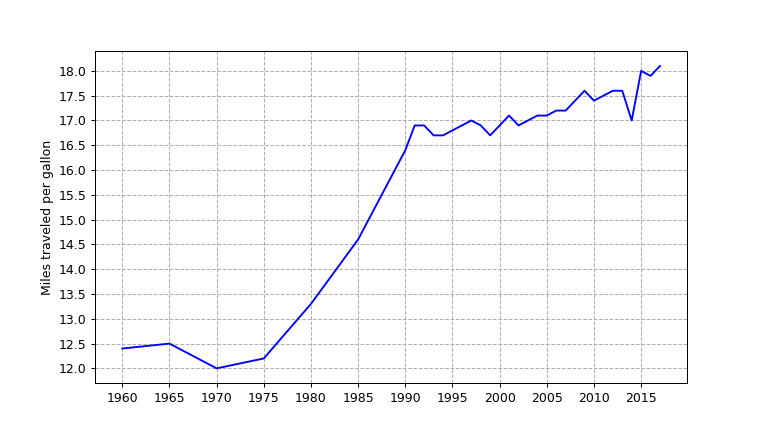

In [98]:
plt.figure(5)
plt.plot(vehicle_df["Year"], vehicle_df["Miles traveled per gallon"], color="blue", label="World Average" )
plt.yticks(list(np.arange(12,18.5,.5)))
plt.xticks(list(np.arange(1960,2017,5)))
plt.grid(linestyle='--')
plt.ylabel("Miles traveled per gallon")

plt.show()

<IPython.core.display.Javascript object>


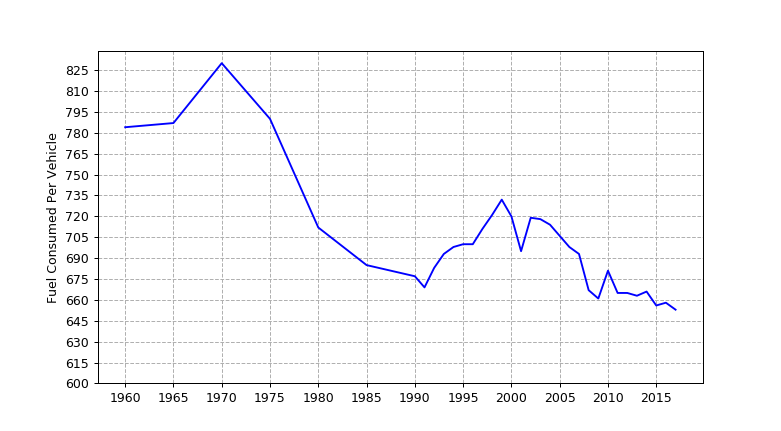

In [103]:
plt.figure(6)
plt.plot(vehicle_df["Year"], vehicle_df["Fuel consumed by vehicle "], color="blue", label="World Average" )
plt.yticks(list(np.arange(600,840,15)))
plt.xticks(list(np.arange(1960,2017,5)))
plt.grid(linestyle='--')
plt.ylabel("Fuel Consumed Per Vehicle")

plt.show()
